In [8]:
import seaborn as sns

sns.set_theme()

In [9]:
import pandas as pd
import geopandas as gpd
import ast
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Read the data from the file
file_path = "../tasks/04/results/kmeans.txt"
with open(file_path, 'r') as file:
    data = file.readlines()

# Parse the data
parsed_data = []

for line in data:
    timestamp = int(line.split(":")[2].split(" - ")[0])
    centroids = ast.literal_eval(line.split("value: ")[1])['centroids']
    for idx, centroid in enumerate(centroids):
        parsed_data.append((timestamp, idx, centroid[0], centroid[1]))

# Create a DataFrame
df = pd.DataFrame(parsed_data, columns=['timestamp', 'centroid_id', 'lat', 'lon'])

In [10]:
df

,timestamp,centroid_id,lat,lon
0,56,0,40.586515,-74.123419
1,56,1,40.734359,-73.978869
2,56,2,40.827831,-73.919514
3,56,3,40.728319,-73.810216
4,56,4,40.645980,-73.962756
...,...,...,...,...
144840,29024,0,40.596246,-74.124517
144841,29024,1,40.754406,-73.973770
144842,29024,2,40.841978,-73.895758
144843,29024,3,40.726939,-73.809531


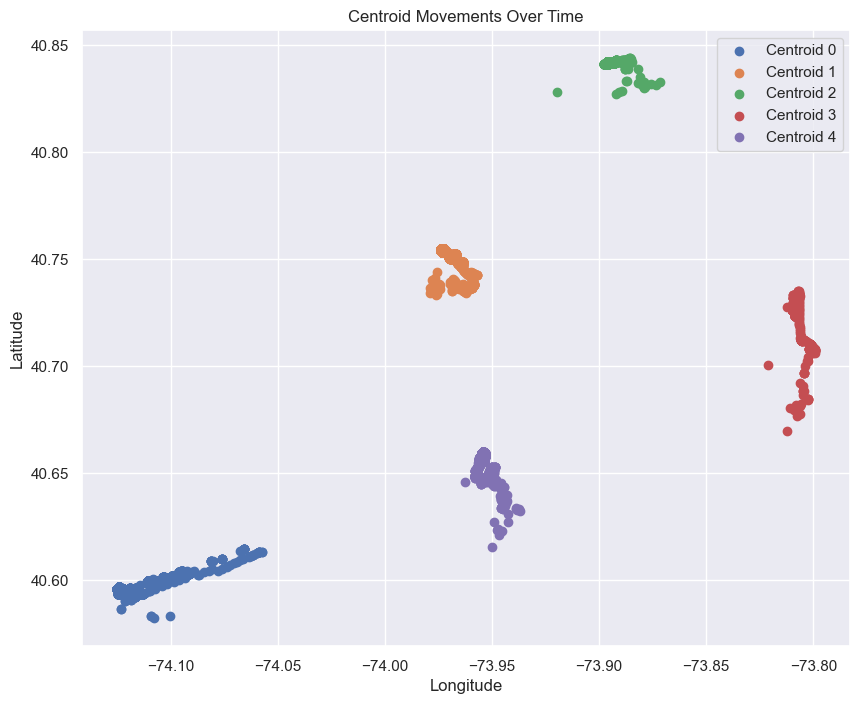

In [11]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Plotting the centroids
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot each centroid_id with a different color
for centroid_id in gdf['centroid_id'].unique():
    centroid_gdf = gdf[gdf['centroid_id'] == centroid_id]
    centroid_gdf.plot(ax=ax, label=f'Centroid {centroid_id}', linestyle='-', marker='o')

# Set title and labels
plt.title('Centroid Movements Over Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()